# Cluster Analysis :

#### It is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

#### For our project we did Customer Segmentation -

In [1]:
# K-Means Clustering :

In [3]:

# importing all the important liberaries that we have required -

# for data preprocessing
import pandas as pd   

# for doing clusetring
from sklearn.cluster import KMeans 

# for visualize our results
import matplotlib.pyplot as plt     


In [5]:

# now we do import data - 

data = pd.read_csv("C:\\Users\\hemant\\Downloads\\Mall_Customers.csv")
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:

# to check the shape of the data -
data.shape


(200, 5)

In [7]:

# check null values - 
data.isnull().sum()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:

# as we can see in our dataset our important feature are - Annual Income & Spending Score,
# so we take only Annual Income & Spending Score

x = data.iloc[:,[3,4]].values


## We will do clustering on the basis of Annual Income and Spending Score :

In [20]:

# as we does not know that how many clusters we have to be used so we would use for loop and intertia, on the basis of
# these we can examine that how many clusters do we have required.

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30241.34361793659,
 25336.946861471864,
 21850.165282585633,
 19634.55462934998]

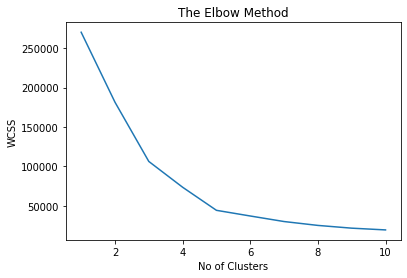

In [21]:

# now we draw skree plot which helps us to determinig the optimium number of clusters

plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()


The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.
So in our plot we can see location of a bend at 5

So we take 5 number of clusters.

In [22]:

# fit data and number of clusters into KMeans- 

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(x)
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

## Now we do Segmentation -

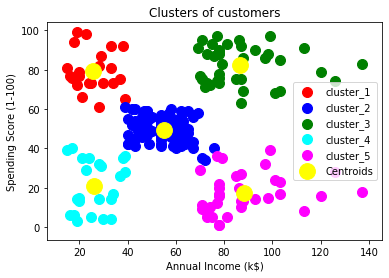

In [31]:

# for doing segmentation we use scatter plot 

plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'red', label = 'cluster_1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'blue', label = 'cluster_2')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'green', label = 'cluster_3')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'cluster_4')
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'cluster_5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 250, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



###  We have done segmentation using 5 number of clusters.

In [ ]:
# 

## Now we can also do Targeting -

==========================================================================================

 On the basis of segments we will do more focus on cluster_5 and cluster_4

 Reason --
 
 Cluster_5 = this group of people have high income but they belongs to low spending score, so first we do target this group of users by doing advertising or promotion and digital marketing.
 
 Cluster_4 = this group of people have low or average income but they also belongs to low spending score, so we do target this group by giving some extra discounts on the products.

 Cluster_2 = this group of people have average income and they belongs to average spending score, so we can do also target this group of users by doing advertising or promotion and digital marketing for spend more money.
 
 
#### In this way we can do target our customers.